# LIBRARIES

In [1]:
%cd /home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks/
## Autorreload all the files
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score#, root_mean_squared_error
## Import every file in ../Scripts/
import os
import sys
sys.path.append('../Scripts')
sys.path.append('MonoKAN/Scripts/')
sys.path.append('MonoKAN/loaders/')
import KANLayer
import KAN
import spline
import utils
import importlib
import CustomELU
import grid_search
importlib.reload(KANLayer)
importlib.reload(KAN)
importlib.reload(spline)
importlib.reload(utils)
importlib.reload(CustomELU)
importlib.reload(grid_search)

from KANLayer import KANLayer
from KAN import KAN
from CustomELU import CustomELU
from grid_search import grid_search

import torch.nn as nn
import torch
import torch.nn as nn

from mono_dense_keras.experiments import (
    create_tuner_stats,
    find_hyperparameters,
    get_train_n_test_data,
)
#torch.set_printoptions(sci_mode=False, precision=3)
print("Device", torch.cuda.is_available())

## Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



/home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks


/home/apolo/PhD/Constrained_Mono/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
2024-09-16 12:24:58.849963: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 12:24:58.930343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 12:24:59.910548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Device False


#### MACHINE EXPECIFICATIONS

In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU E5-2640 v4 @ 2.40GHz
stepping	: 1
microcode	: 0xb000020
cpu MHz		: 2400.000
cache size	: 25600 KB
physical id	: 0
siblings	: 20
core id		: 0
cpu cores	: 10
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 20
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc aperfmperf eagerfpu pni pclmulqdq dtes64 ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid dca sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch epb cat_l3 cdp_l3 invpcid_single intel_ppin rsb_ctxsw tpr_shadow vnmi flexpriority ept vpid fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm cqm rdt_a rdseed adx smap intel_pt xsaveopt cqm_llc cqm_occup_llc

In [3]:
## PRINT LOCAL RESOURCES
!lscpu

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                40
On-line CPU(s) list:   0-39
Thread(s) per core:    2
Core(s) per socket:    10
Socket(s):             2
NUMA node(s):          2
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 79
Model name:            Intel(R) Xeon(R) CPU E5-2640 v4 @ 2.40GHz
Stepping:              1
CPU MHz:               2400.146
CPU max MHz:           2400,0000
CPU min MHz:           1200,0000
BogoMIPS:              4788.95
Virtualization:        VT-x
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              25600K
NUMA node0 CPU(s):     0-9,20-29
NUMA node1 CPU(s):     10-19,30-39
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc arch_perfmon pebs bts rep_good nopl xtopo

In [4]:
!cat /proc/meminfo


MemTotal:       263563608 kB
MemFree:        28496032 kB
MemAvailable:   108323624 kB
Buffers:            1292 kB
Cached:         66075672 kB
SwapCached:       489284 kB
Active:         162833648 kB
Inactive:       43823264 kB
Active(anon):   131231468 kB
Inactive(anon): 13625800 kB
Active(file):   31602180 kB
Inactive(file): 30197464 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:      33554428 kB
SwapFree:       16826808 kB
Dirty:               540 kB
Writeback:             0 kB
AnonPages:      140098248 kB
Mapped:          1019744 kB
Shmem:           4277316 kB
Slab:           20158492 kB
SReclaimable:   18912148 kB
SUnreclaim:      1246344 kB
KernelStack:      147648 kB
PageTables:       448348 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    165336232 kB
Committed_AS:   301434100 kB
VmallocTotal:   34359738367 kB
VmallocUsed:      847256 kB
VmallocChunk:   34224555344 kB
Percpu:            31872 kB
Hardwar

# TRAINING BLOG

In [7]:
import sys
sys.path.append('../loaders')
import blog_loader
from blog_loader import mono_list
from sklearn.linear_model import Ridge


device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
X_train, y_train, X_test, y_test = blog_loader.load_data(path ='../data/Preprocessed_Data/Blog/',get_categorical_info=False)
original_X_train = X_train.copy()
original_X_test = X_test.copy()


## Define if rigde regression is going to be used
ridged = True

if ridged:
    print('Ridge Regression')
    model = Ridge()
    model.fit(
        X_train, y_train,
    )
    rmse = np.sqrt(np.mean((model.predict(X_test) - y_test) ** 2))
    important_feature_idxs = np.argsort(model.coef_)[::-1][:20]

    X_train = X_train[:, important_feature_idxs]
    X_test = X_test[:, important_feature_idxs]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

mean = X_train_tensor.mean(0)
std = X_train_tensor.std(0)
X_train_tensor = (X_train_tensor - mean) / std
X_test_tensor = (X_test_tensor - mean) / std

## Print number of instances in train_data and test_data
print('Number of instances in train_data:', X_train_tensor.shape)
print('Number of instances in test_data:', X_test_tensor.shape)


n_var = X_train_tensor.shape[1]

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor


Ridge Regression
Number of instances in train_data: torch.Size([47302, 20])
Number of instances in test_data: torch.Size([6968, 20])


In [18]:
#### INITIALIZATION OF THE MODEL WITH KAN MODEL ####
import KAN
importlib.reload(KAN)
from KAN import KAN

ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()

classification = False
hermite = True
seed=0

model = KAN(width=[n_var,10,1], grid=10,grid_range=[ini,fin], k=-1, 
            noise_scale=0.1,noise_scale_base=0.1, seed=seed,grid_eps=0,
            base_fun=nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)

if hermite:
    monotone_constraints = np.array(
    [1 if i in mono_list else 0 for i in range(original_X_train.shape[1])])
    if ridged:
        monotone_constraints = monotone_constraints[important_feature_idxs]
    mono_vars = {i: value for i, value in enumerate(monotone_constraints)}
    model.apply_constraints_hermite_vectorized(mono_vars)


Regression


Epoch: 1422/5000 | train loss: 1.69e-01 | test loss: 1.55e-01 | reg: 0.00e+00:  28%|▎| 1422/5000 [17


Early stopping
Train MSE Error tensor(0.0276, grad_fn=<MseLossBackward0>)
Test MSE Error tensor(0.0245, grad_fn=<MseLossBackward0>)


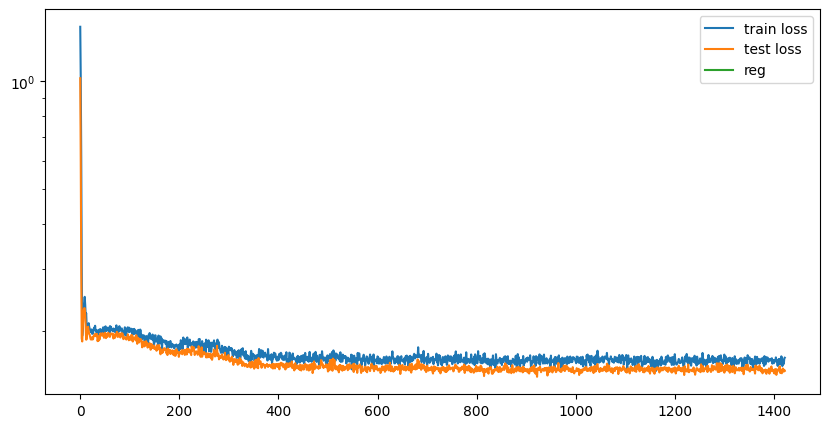

In [19]:
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

batch = 47302//10


model.train(dataset, opt="Adam", steps=5000, lamb=0.00,lamb_l1=0,lamb_entropy=0.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.01,monotonic=True,monotonic_vars=mono_vars,patience=500,loss_fn=loss_fn,batch=batch,early_stopping_metric='loss')


### Results
if not classification: 
    y_pred = model.forward(X_train_tensor)
    print('Train MSE Error',torch.nn.functional.mse_loss(y_pred,y_train_tensor))

    y_pred = model.forward(X_test_tensor)
    print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))   
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()

In [21]:
import math
math.sqrt(0.0245)

0.15652475842498528

# TRAINING LOAN

In [2]:
import sys
sys.path.append('../loaders')
import loan_loader
from loan_loader import mono_list

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
X_train, y_train, X_test, y_test = loan_loader.load_data(path ='../data/Preprocessed_Data/Loan/preprocessed.csv',get_categorical_info=False)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# mean = X_train_tensor.mean(0)
# std = X_train_tensor.std(0)
# X_train_tensor = (X_train_tensor - mean) / std
# X_test_tensor = (X_test_tensor - mean) / std

## Print number of instances in train_data and test_data
print('Number of instances in train_data:', X_train_tensor.shape)
print('Number of instances in test_data:', X_test_tensor.shape)


n_var = X_train_tensor.shape[1]

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor


Number of instances in train_data: torch.Size([418697, 28])
Number of instances in test_data: torch.Size([70212, 28])


In [ ]:
from sklearn.linear_model import Ridge
X_train, y_train, X_test, y_test = loan_loader.load_data(path ='../data/Preprocessed_Data/Loan/preprocessed.csv',get_categorical_info=False)
monotonic_constraints = np.array([int(i in mono_list) for i in range(X_train.shape[1])])

# Ridge regression to find the best features
ridge = Ridge()
ridge.fit(X_train, y_train)
top_features = np.argsort(np.abs(ridge.coef_))[-15:]


X_train = X_train[:, top_features]
X_test = X_test[:, top_features]
monotonic_constraints = monotonic_constraints[top_features]


X_train_tensor = torch.tensor(X_train).float().to(device)
X_test_tensor = torch.tensor(X_test).float().to(device)
y_train_tensor = torch.tensor(y_train).float().unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test).float().unsqueeze(1).to(device)

# mean = X_train_tensor.mean(0)
# std = X_train_tensor.std(0)
# X_train_tensor = (X_train_tensor - mean) / std
# X_test_tensor = (X_test_tensor - mean) / std

## Print number of instances in train_data and test_data
print('Number of instances in train_data:', X_train_tensor.shape)
print('Number of instances in test_data:', X_test_tensor.shape)


n_var = X_train_tensor.shape[1]

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor

In [7]:
#### INITIALIZATION OF THE MODEL WITH KAN MODEL ####
import KAN
importlib.reload(KAN)
from KAN import KAN

ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()

classification = True
hermite = True
seed=0

model = KAN(width=[n_var,5,1], grid=10,grid_range=[ini,fin], k=-1, 
            noise_scale=0.1,noise_scale_base=0.1, seed=seed,grid_eps=0,
            base_fun=nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)

if hermite:
    monotone_constraints = np.array([int(i in mono_list) for i in range(X_train.shape[1])])
    mono_vars = {i: value for i, value in enumerate(monotone_constraints)}
    model.apply_constraints_hermite_vectorized(mono_vars)


Classification


Epoch: 0/5000 | train loss: 9.05e-01 | test loss: 8.32e-01 | reg: 0.00e+00:   0%| | 1/5000 [00:00<34

Epoch: 961/5000 | train loss: 7.96e-01 | test loss: 8.06e-01 | reg: 0.00e+00:  19%|▏| 961/5000 [05:5


Early stopping
Train Accuracy 0.642588793327872
Test Accuracy 0.646285535236142


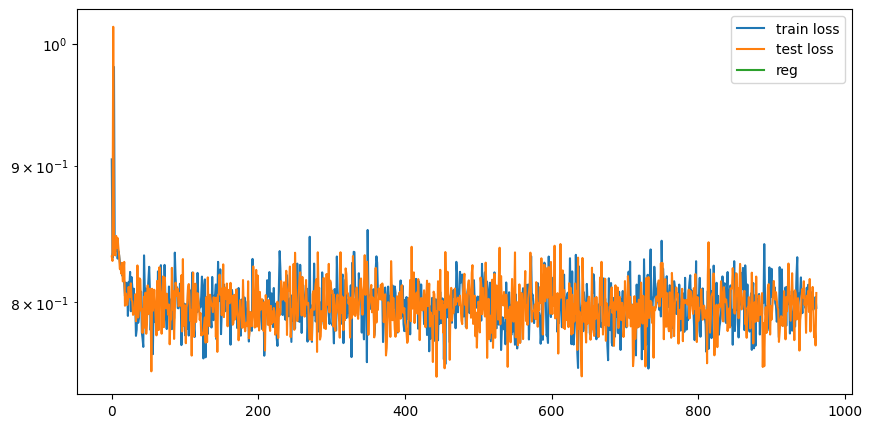

In [8]:
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

batch = 256


model.train(dataset, opt="Adam", steps=5000, lamb=0.00,lamb_l1=0,lamb_entropy=0.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.1,monotonic=True,monotonic_vars=mono_vars,patience=500,loss_fn=loss_fn,batch=batch,early_stopping_metric='accuracy')


### Results
if not classification: 
    y_pred = model.forward(X_train_tensor)
    print('Train MSE Error',torch.nn.functional.mse_loss(y_pred,y_train_tensor))

    y_pred = model.forward(X_test_tensor)
    print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))   
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()


# TRAINING COMPAS

In [8]:
import sys
sys.path.append('loaders')
import compas_loader
from compas_loader import mono_list

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
X_train, y_train, X_test, y_test = compas_loader.load_data(path ='../data/Preprocessed_Data/Compas/compas_scores_two_years.csv',get_categorical_info=False)

X_train_tensor = torch.tensor(X_train).float().to(device)
X_test_tensor = torch.tensor(X_test).float().to(device)
y_train_tensor = torch.tensor(y_train).float().unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test).float().unsqueeze(1).to(device)

mean = X_train_tensor.mean(0)
std = X_train_tensor.std(0)
X_train_tensor = (X_train_tensor - mean) / std
X_test_tensor = (X_test_tensor - mean) / std

## Print number of instances in train_data and test_data
print('Number of instances in train_data:', X_train_tensor.shape)
print('Number of instances in test_data:', X_test_tensor.shape)


n_var = X_train_tensor.shape[1]

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor


Number of instances in train_data: torch.Size([4937, 13])
Number of instances in test_data: torch.Size([1235, 13])


In [35]:
#### INITIALIZATION OF THE MODEL WITH KAN MODEL ####
import KAN
importlib.reload(KAN)
from KAN import KAN

ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()

classification = True
hermite = True
seed=0
model = KAN(width=[n_var,5,5,1], grid=10,grid_range=[ini,fin], k=-1, 
            noise_scale=0.1,noise_scale_base=0.1, seed=seed,grid_eps=0,
            base_fun=nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)

if hermite:
    monotone_constraints = [1 if i in mono_list else 0 for i in range(X_train.shape[1])]
    mono_vars = {i: value for i, value in enumerate(monotone_constraints)}
    model.apply_constraints_hermite_vectorized(mono_vars)

    

Classification


Epoch: 1235/5000 | train loss: 7.63e-01 | test loss: 8.43e-01 | reg: 0.00e+00:  25%|▏| 1235/5000 [07/home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks/../Scripts/KAN.py:2482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

Early stopping
Train Accuracy 0.688879886570792
Test Accuracy 0.6979757085020243


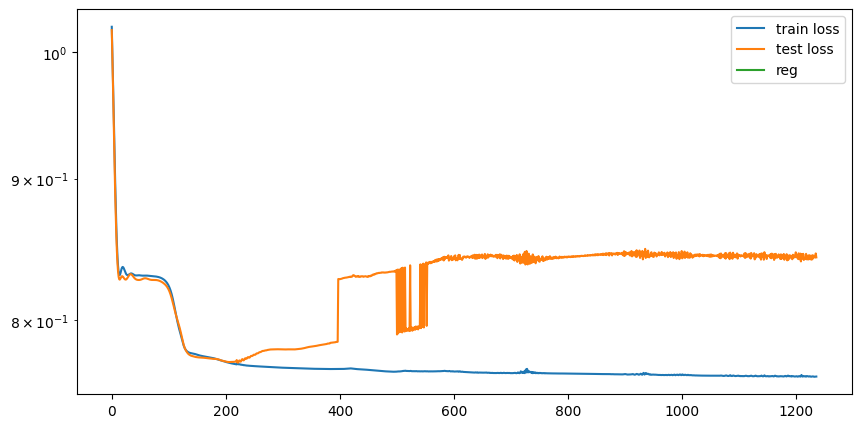

In [36]:
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

model.train(dataset, opt="Adam", steps=5000, lamb=0.00,lamb_l1=0,lamb_entropy=0.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.01,monotonic=True,monotonic_vars=mono_vars,patience=500,loss_fn=loss_fn,batch=-1,early_stopping_metric='accuracy')


### Results
if not classification: 
    y_pred = model.forward(X_train_tensor)
    print('Train MSE Error',torch.nn.functional.mse_loss(y_pred,y_train_tensor))

    y_pred = model.forward(X_test_tensor)
    print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))   
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()

In [37]:

y_pred = model.forward(X_train_tensor)
print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

y_pred = model.forward(X_test_tensor) 
print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))


Train Accuracy 0.688879886570792
Test Accuracy 0.6979757085020243


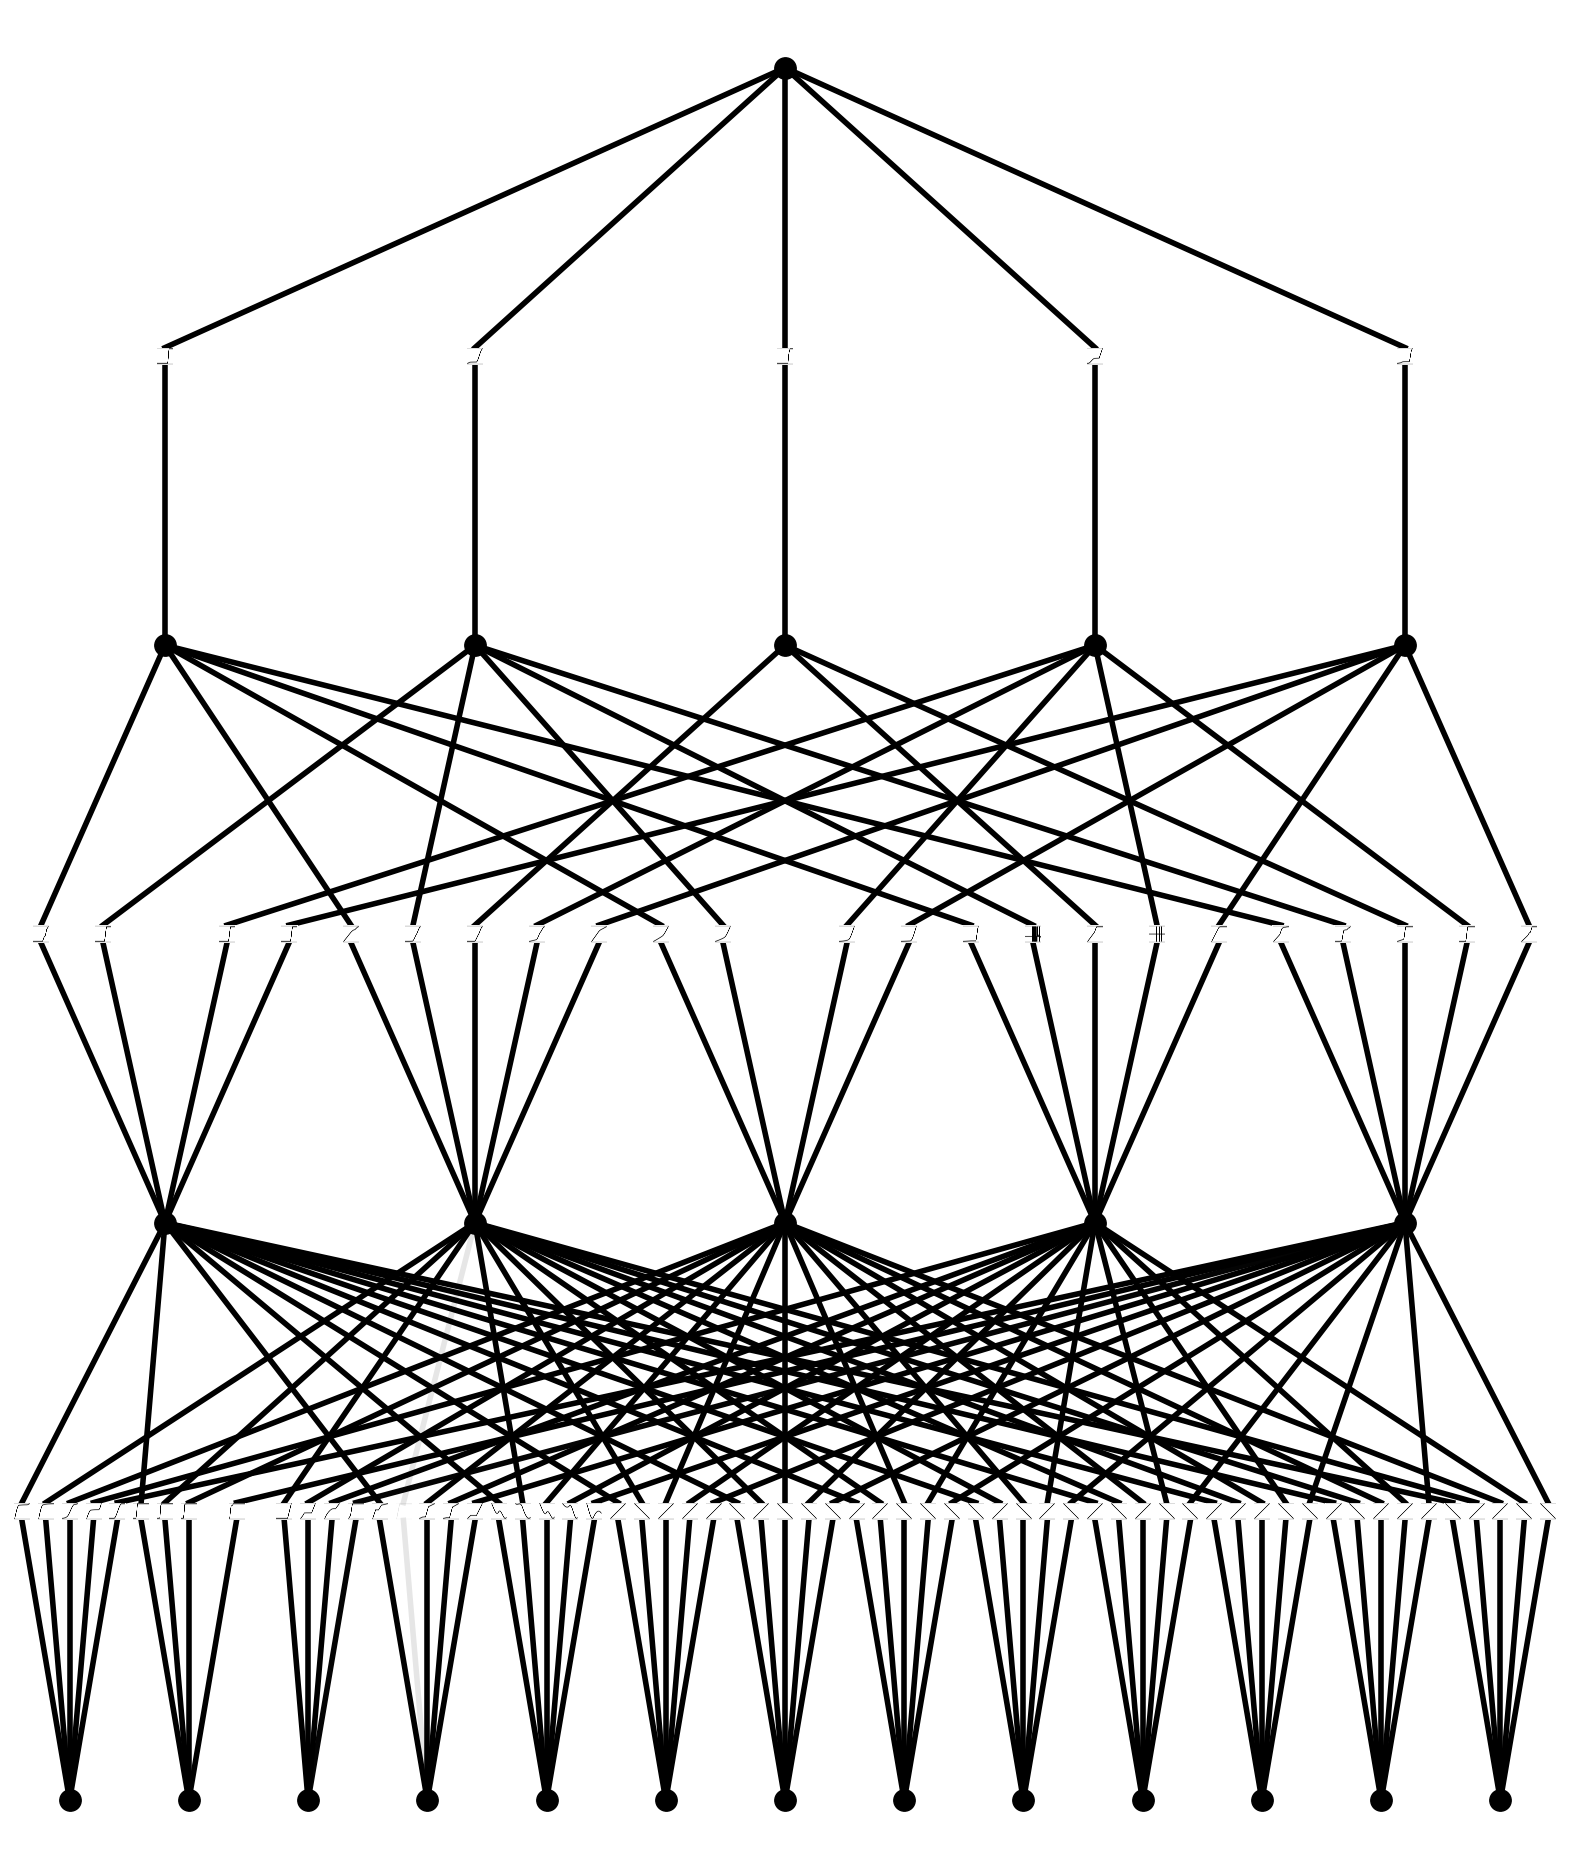

In [41]:
model.plot(beta=10000,scale=2)

# TRAINING - AUTOMPG

In [3]:
df = pd.read_csv('../data/Preprocessed_Data/Autompg/auto-mpg.csv')
df = df[df.horsepower != "?"]
# mpg is regression target
# cylinders, displacement, horsepower, weight, acceleration, model year, origin are features
X = df.drop(columns=['mpg', 'car name']).values
Y = df['mpg'].values
X = torch.tensor(X.astype(float), dtype=torch.float32)
Y = torch.tensor(Y.astype(float), dtype=torch.float32).view(-1, 1)
# X = (X - X.mean(0)) / X.std(0)
# Ymean = Y.mean(0)
# Ystd = Y.std(0)
#Y = (Y - Ymean) / Ystd

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X, Y, test_size=0.2, random_state=0)
## Print number of instances in train_data and test_data
print('Number of instances in train_data:', X_train_tensor.shape)
print('Number of instances in test_data:', X_test_tensor.shape)

X_tr_mean = X_train_tensor.mean(0)
X_tr_std = X_train_tensor.std(0)
X_train_tensor = (X_train_tensor-X_tr_mean)/X_tr_std
X_test_tensor = (X_test_tensor-X_tr_mean)/X_tr_std

n_var = X_train_tensor.shape[1]

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor


Number of instances in train_data: torch.Size([313, 7])
Number of instances in test_data: torch.Size([79, 7])


In [4]:
#### INITIALIZATION OF THE MODEL WITH KAN MODEL ####
import KAN
importlib.reload(KAN)
from KAN import KAN

ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()

classification = False
hermite = True
seed=0
model = KAN(width=[7,2,3,1], grid=10,grid_range=[ini,fin], k=-1, 
            noise_scale=0.0,noise_scale_base=0.0, seed=0,grid_eps=0,
            base_fun=nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)

if hermite:
    mono_vars = {0:0,1:-1,2:-1,3:-1,4:0,5:0,6:0}
    model.apply_constraints_hermite_vectorized(mono_vars)

Regression


Epoch: 1451/5000 | train loss: 5.02e+00 | test loss: 6.60e+00 | best test loss: 5.85e+00 | reg: 7.80


Early stopping
Train MSE Error tensor(5.3807, grad_fn=<MseLossBackward0>)
Test MSE Error tensor(5.8494, grad_fn=<MseLossBackward0>)


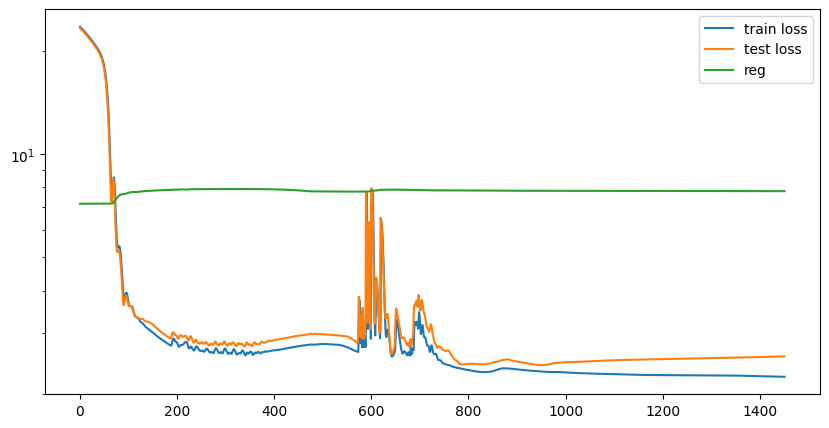

In [5]:
torch.manual_seed(0)
if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

model.train(dataset, opt="Adam", steps=5000, lamb=1.00,lamb_l1=0,lamb_entropy=1.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.01,monotonic=True,monotonic_vars=mono_vars,patience=500,loss_fn=loss_fn,batch=-1)


### Results
if not classification: 
    y_pred = model.forward(X_train_tensor)
    print('Train MSE Error',torch.nn.functional.mse_loss(y_pred,y_train_tensor))

    y_pred = model.forward(X_test_tensor)
    print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))   
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()

Regression


Epoch: 1451/5000 | train loss: 2.24e+00 | test loss: 2.57e+00 | reg: 7.80e+00:  29%|▎| 1451/5000 [01


Early stopping
Best test loss:  tensor(5.8494, grad_fn=<MseLossBackward0>)
Train MSE Error tensor(5.3807, grad_fn=<MseLossBackward0>)
Test MSE Error tensor(5.8494, grad_fn=<MseLossBackward0>)


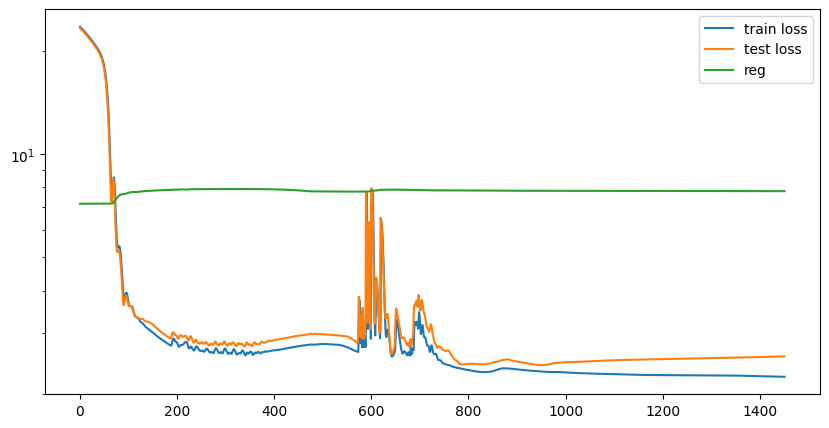

In [22]:
torch.manual_seed(0)
if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

model.train(dataset, opt="Adam", steps=5000, lamb=1.00,lamb_l1=0,lamb_entropy=1.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.01,monotonic=True,monotonic_vars=mono_vars,patience=500,loss_fn=loss_fn,batch=-1)


### Results
if not classification: 
    y_pred = model.forward(X_train_tensor)
    print('Train MSE Error',torch.nn.functional.mse_loss(y_pred,y_train_tensor))

    y_pred = model.forward(X_test_tensor)
    print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))   
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()

In [6]:
y_pred = model.forward(X_test_tensor)
print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))  

Test MSE Error tensor(5.8494, grad_fn=<MseLossBackward0>)


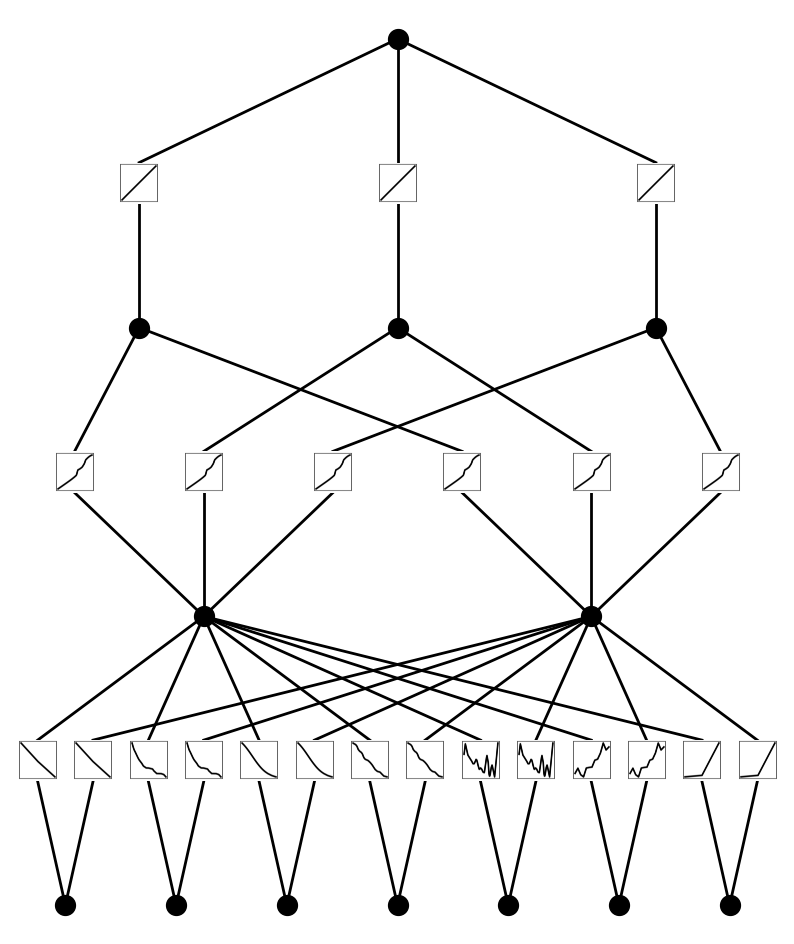

In [7]:
model.plot(beta=1000,scale=1)

# TRAINING HEART

In [2]:
df_train = pd.read_csv("../data/Preprocessed_Data/heart/heart_train.csv",index_col=0)
df_test = pd.read_csv("../data/Preprocessed_Data/heart/heart_test.csv",index_col=0)

def preprocess(df):
  X = df.drop(columns=['target']).values
  Y = df['target'].values
  X = torch.tensor(X.astype(float), dtype=torch.float32)
  Y = torch.tensor(Y.astype(float), dtype=torch.float32).view(-1, 1)
  X = (X - X.mean(0)) / X.std(0)
  return X, Y
X_train_tensor, y_train_tensor = preprocess(df_train)
X_test_tensor, y_test_tensor = preprocess(df_test)

## Print number of instances in train_data and test_data
print('Number of instances in train_data:', X_train_tensor.shape)
print('Number of instances in test_data:', X_test_tensor.shape)

n_var = X_train_tensor.shape[1]

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor


Number of instances in train_data: torch.Size([242, 13])
Number of instances in test_data: torch.Size([61, 13])


In [4]:
#### INITIALIZATION OF THE MODEL WITH KAN MODEL ####
import KAN
importlib.reload(KAN)
from KAN import KAN

ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()

classification = True
hermite = True
seed=0
model = KAN(width=[n_var,5,3,1], grid=7,grid_range=[ini,fin], k=-1, 
            noise_scale=0.1,noise_scale_base=0.1, seed=0,grid_eps=0,
            base_fun=nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)

if hermite:
    # mono_vars = {i:1 if i in range(3,5) else 0 for i in range(13)} ## HEART
    monotone_constraints = [0] * X_train_tensor.shape[1]
    monotone_constraints[df_train.columns.get_loc('trestbps')] = 1
    monotone_constraints[df_train.columns.get_loc('chol')] = 1
    mono_vars = {i: value for i, value in enumerate(monotone_constraints)}
    model.apply_constraints_hermite_vectorized(mono_vars)

Classification


Epoch: 159/5000 | train loss: 1.45e-01 | test loss: 2.30e+00 | best test loss: 2.52e-01 | reg: 0.00e


Early stopping
Train Accuracy 0.9090909090909091
Test Accuracy 0.9180327868852459


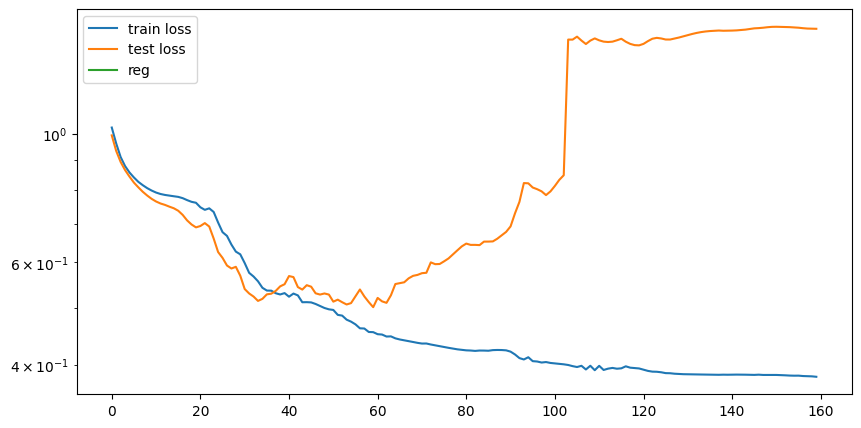

In [15]:
torch.manual_seed(0)
if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

model.train(dataset, opt="Adam", steps=5000, lamb=0.00,lamb_l1=0,lamb_entropy=0.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.05,monotonic=True,monotonic_vars=mono_vars,patience=100,loss_fn=loss_fn,batch=-1,early_stopping_metric='accuracy')


### Results
if not classification: 
    y_pred = model.forward(X_train_tensor)
    print('Train MSE Error',torch.nn.functional.mse_loss(y_pred,y_train_tensor))

    y_pred = model.forward(X_test_tensor)
    print('Test MSE Error',torch.nn.functional.mse_loss(y_pred,y_test_tensor))   
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()

In [6]:
#### INITIALIZATION OF THE MODEL WITH KAN MODEL ####
import KAN
importlib.reload(KAN)
from KAN import KAN
import random 
## Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
torch.use_deterministic_algorithms(True)

ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()

classification = True
hermite = True
train_accs = []
test_accs= []
for m in range(0,3):
    model = KAN(width=[n_var,5,3,1], grid=7,grid_range=[ini,fin], k=-1, 
                noise_scale=0.1,noise_scale_base=0.1, seed=m,grid_eps=0,
                base_fun=nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)
    
    if hermite:
        # mono_vars = {i:1 if i in range(3,5) else 0 for i in range(13)} ## HEART
        monotone_constraints = [0] * X_train_tensor.shape[1]
        monotone_constraints[df_train.columns.get_loc('trestbps')] = 1
        monotone_constraints[df_train.columns.get_loc('chol')] = 1
        mono_vars = {i: value for i, value in enumerate(monotone_constraints)}
        model.apply_constraints_hermite_vectorized(mono_vars)
    
    if classification:
        print('Classification')
        loss_fn = nn.BCELoss()
    else:
        print('Regression')
        loss_fn = nn.MSELoss()
    
    model.train(dataset, opt="Adam", steps=5000, lamb=0.00,lamb_l1=0,lamb_entropy=0.0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
                update_grid=False,lr=0.05,monotonic=True,monotonic_vars=mono_vars,patience=100,loss_fn=loss_fn,batch=-1,early_stopping_metric='accuracy')

    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))
    train_accs.append(accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))
    
    y_pred = model.forward(X_test_tensor) 
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))
    test_accs.append(accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))
    
    
    # model.plot_history()

Classification


Epoch: 146/5000 | train loss: 1.60e-01 | test loss: 5.95e-01 | best test loss: 2.61e-01 | reg: 0.00e


Early stopping
Train Accuracy 0.859504132231405
Test Accuracy 0.9016393442622951
Classification


Epoch: 197/5000 | train loss: 1.59e-01 | test loss: 3.04e-01 | best test loss: 2.70e-01 | reg: 0.00e


Early stopping
Train Accuracy 0.9132231404958677
Test Accuracy 0.9016393442622951
Classification


Epoch: 165/5000 | train loss: 1.61e-01 | test loss: 4.65e-01 | best test loss: 2.70e-01 | reg: 0.00e

Early stopping
Train Accuracy 0.9008264462809917
Test Accuracy 0.9180327868852459


In [7]:
mean_values = np.array(test_accs).mean()
print(f'Mean of the values: {mean_values}')
## Compute the standard deviation
std_dev = np.array(test_accs).std()
print(f'Standard deviation: {std_dev}')

Mean of the values: 0.907103825136612
Standard deviation: 0.007727942963787413


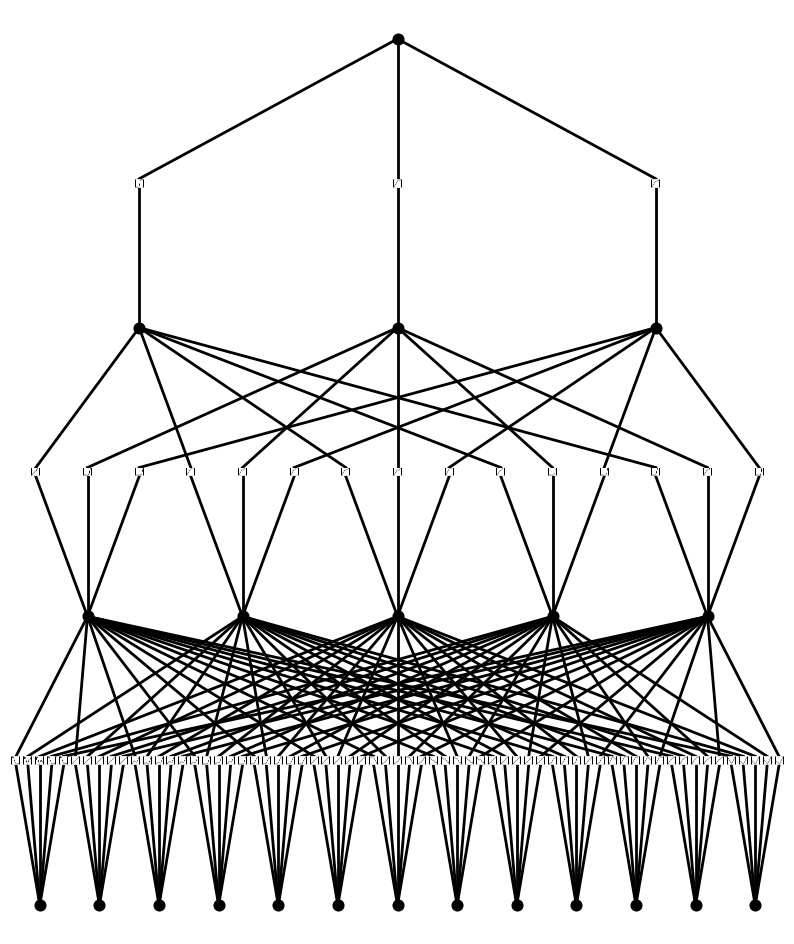

In [20]:
model.plot(beta=1000,scale=1)

# GRID SEARCH BLOG

In [10]:
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)
neurons_list = [[10,1]]  # example neuron configurations
k_list = [-1]
lambda_l1_list = [0.0]
lambda_entropy_list = [0.0]
seeds = [0,1, 2]

# Define other fixed parameters
grids = [10]
noise_scale = 0.1
noise_scale_base = 0.1
grid_eps = 0
symbolic_enabled = False
opt = "Adam"
steps = 5000
lamb = 0.00
small_reg_factor = 0
update_grid = False
lr_list = [0.01]
monotonic = True
base_function = torch.nn.Sigmoid()
patience = 500
batch = 47302//10
hermite = True

Ridge Regression
Number of instances in train_data: torch.Size([47302, 20])
Number of instances in test_data: torch.Size([6968, 20])
Number of instances in train_data: 47302
Number of instances in test_data: 6968
Training model with parameters: seed=1, neurons=[20, 10, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 5891 parameters.
Regression


Epoch: 3964/5000 | train loss: 2.72e-02 | test loss: 2.41e-02 | best test loss: 2.35e-02 | reg: 0.00


Early stopping


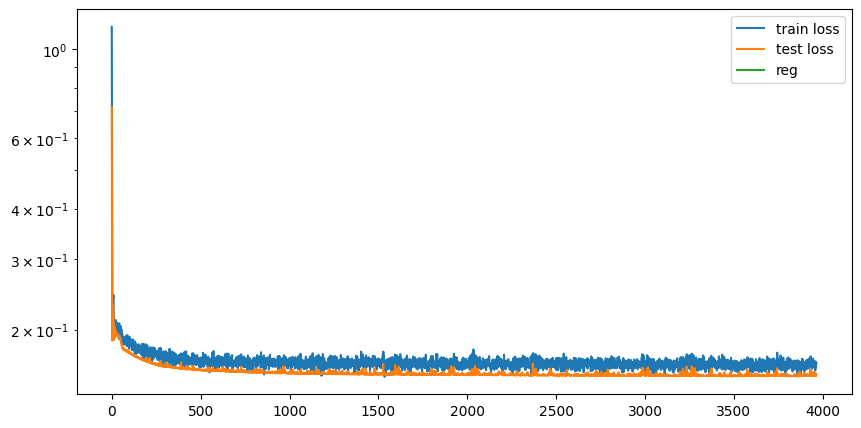

Training model with parameters: seed=2, neurons=[20, 10, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 5891 parameters.
Regression


Epoch: 3658/5000 | train loss: 2.72e-02 | test loss: 2.37e-02 | best test loss: 2.36e-02 | reg: 0.00


Early stopping


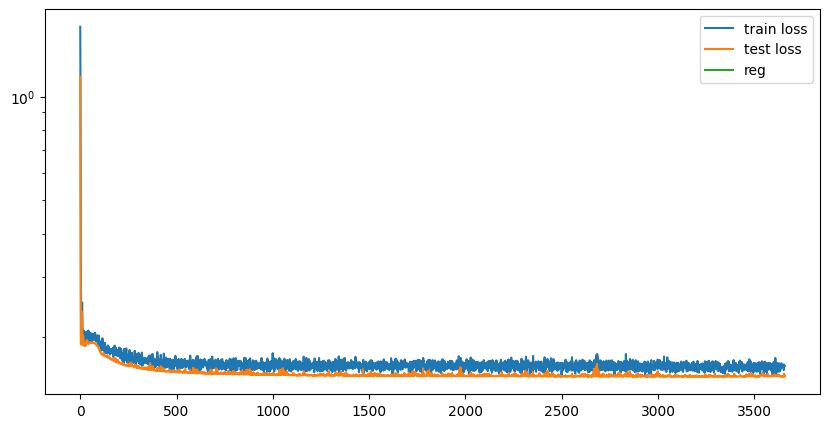

Grid search completed and results saved to grid_search_results.csv


In [11]:
dataset_name ='blog'
grid_search(dataset_name=dataset_name,neurons_list=neurons_list, k_list=k_list, lambda_l1_list=lambda_l1_list,
            lambda_entropy_list=lambda_entropy_list, seeds=seeds
                ,grids=grids, noise_scale=noise_scale, noise_scale_base=noise_scale_base, grid_eps=grid_eps,
             symbolic_enabled=symbolic_enabled, opt=opt, patience=patience, hermite=hermite,normalize=False,
                steps=steps, lamb=lamb, small_reg_factor=small_reg_factor,
             update_grid=update_grid, lr_list=lr_list, monotonic=monotonic, base_function=base_function,batch_size=batch)

In [18]:
import math
results = pd.read_csv('grid_search_results_blog.csv')
## Convert column test to square root
results['test'] = results['test'].apply(lambda x: math.sqrt(x))
results['train'] = results['train'].apply(lambda x: math.sqrt(x))
## Compute the mean
mean_values = results['test'].mean().round(3)
print(f'Mean of the values: {mean_values}')
## Compute the standard deviation
std_dev = results['test'].std().round(4)
print(f'Standard deviation: {std_dev}')
results.head()

Mean of the values: 0.153
Standard deviation: 0.0003


,neurons,k,lamb,noise_scale,noise_scale_base,lambda_l1,lambda_entropy,grid,seed,opt,patience,hermite,normalize,lr,bath_size,train,test
0,"[20, 10, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,0,Adam,500,True,False,0.01,4730,0.163867,0.153722
1,"[20, 10, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,1,Adam,500,True,False,0.01,4730,0.163343,0.153212
2,"[20, 10, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,2,Adam,500,True,False,0.01,4730,0.164148,0.153539


# GRID SEARCH LOAN

In [15]:
torch.manual_seed(0)
neurons_list = [[10,5,1]] 

k_list = [-1]
lambda_l1_list = [0.0]
lambda_entropy_list = [0.0]
seeds = [0, 1, 2]

# Define other fixed parameters
grids = [10]
noise_scale = 0.1
noise_scale_base = 0.1
grid_eps = 0
symbolic_enabled = False
opt = "Adam"
steps = 5000
lamb = 0.00
small_reg_factor = 0
update_grid = False
lr_list = [0.01]
monotonic = True
base_function = torch.nn.Sigmoid()
patience = 500
batch = 418697//10
hermite = True

Ridge Regression
Number of instances in train_data: torch.Size([418697, 15])
Number of instances in test_data: torch.Size([70212, 15])
Number of instances in train_data: 418697
Number of instances in test_data: 70212
Training model with parameters: seed=0, neurons=[15, 10, 5, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 5756 parameters.
Classification


Epoch: 1477/5000 | train loss: 6.25e-01 | test loss: 6.22e-01 | best test loss: 6.22e-01 | reg: 0.00

Early stopping


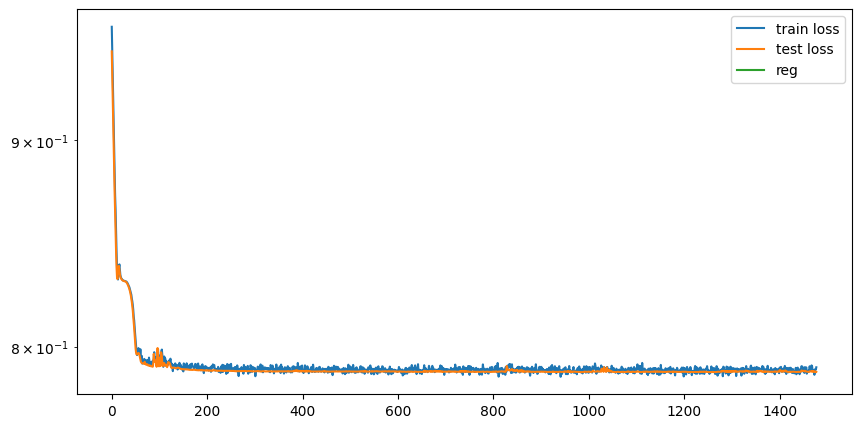

Training model with parameters: seed=1, neurons=[15, 10, 5, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 5756 parameters.
Classification


Epoch: 1581/5000 | train loss: 6.25e-01 | test loss: 6.22e-01 | best test loss: 6.22e-01 | reg: 0.00

Early stopping


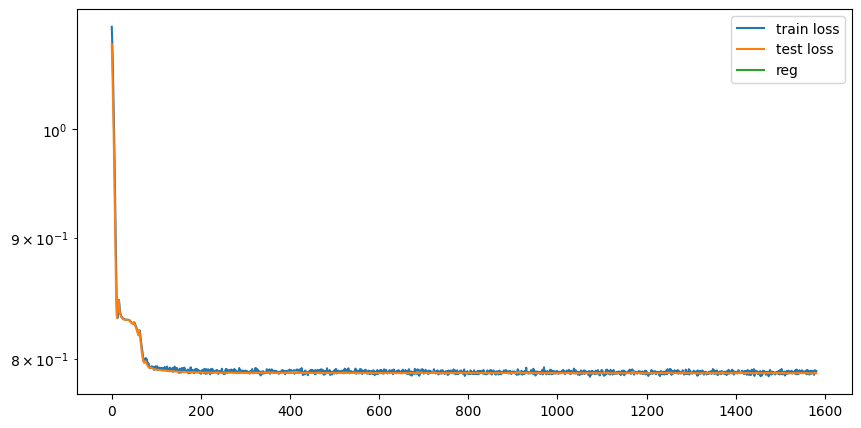

Training model with parameters: seed=2, neurons=[15, 10, 5, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 5756 parameters.
Classification


Epoch: 1086/5000 | train loss: 6.25e-01 | test loss: 6.22e-01 | best test loss: 6.22e-01 | reg: 0.00

Early stopping


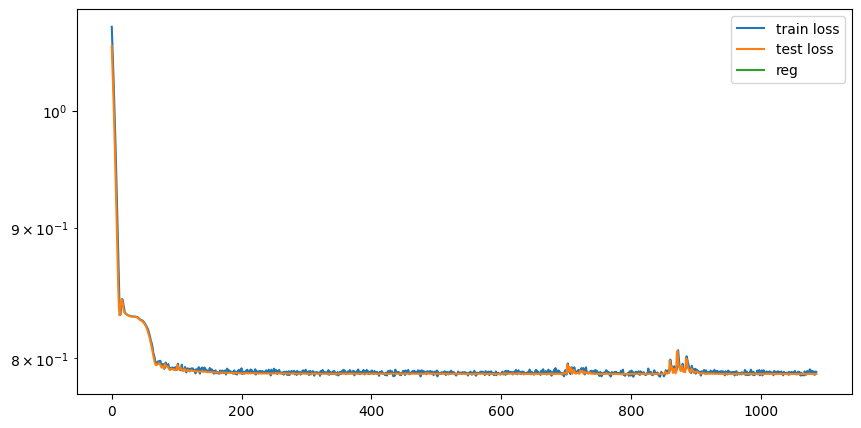

Grid search completed and results saved to grid_search_results.csv


In [16]:
dataset_name ='loan'
grid_search(dataset_name=dataset_name,neurons_list=neurons_list, k_list=k_list, lambda_l1_list=lambda_l1_list,
            lambda_entropy_list=lambda_entropy_list, seeds=seeds
                ,grids=grids, noise_scale=noise_scale, noise_scale_base=noise_scale_base, grid_eps=grid_eps,
             symbolic_enabled=symbolic_enabled, opt=opt, patience=patience, hermite=hermite,normalize=False,
                steps=steps, lamb=lamb, small_reg_factor=small_reg_factor,
             update_grid=update_grid, lr_list=lr_list, monotonic=monotonic, base_function=base_function,batch_size=batch)

In [17]:
### RESULTS FOR THE FIRST THREE
import ast
results = pd.read_csv('grid_search_results_loan.csv')
## Compute the mean of the first 3 values
mean_first_3 = results['test'].iloc[:3].mean().round(3)*100
print(f'Mean of the first 3 values: {mean_first_3}')
## Compute the standard deviation
std_dev = results['test'].iloc[:3].std().round(4)*100
print(f'Standard deviation: {std_dev}')
results.head(3)

Mean of the first 3 values: 65.4
Standard deviation: 0.02


,neurons,k,lamb,noise_scale,noise_scale_base,lambda_l1,lambda_entropy,grid,seed,opt,patience,hermite,normalize,lr,bath_size,train,test
0,"[15, 10, 5, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,0,Adam,500,True,False,0.01,41869,0.649324,0.653962
1,"[15, 10, 5, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,1,Adam,500,True,False,0.01,41869,0.649298,0.654105
2,"[15, 10, 5, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,2,Adam,500,True,False,0.01,41869,0.648536,0.653692


# GRID SEARCH COMPAS

In [35]:
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

neurons_list = [[5,5,1]]  # example neuron configurations
k_list = [-1]
lambda_l1_list = [0.0]
lambda_entropy_list = [0.0]
seeds = [0, 1, 2]

# Define other fixed parameters
grids = [10]
noise_scale = 0.1
noise_scale_base = 0.1
grid_eps = 0
symbolic_enabled = False
opt = "Adam"
steps = 5000
lamb = 0.00
small_reg_factor = 0
update_grid = False
lr_list = [0.01]
monotonic = True
base_function = torch.nn.Sigmoid()
patience = 500
batch = -1
hermite = True

/home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks/../loaders/compas_loader.py:105: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(row, range(len(row)))


Number of instances in train_data: torch.Size([4937, 13])
Number of instances in test_data: torch.Size([1235, 13])
Number of instances in train_data: 4937
Number of instances in test_data: 1235
Training model with parameters: seed=0, neurons=[13, 5, 5, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 2671 parameters.
Classification


Epoch: 1235/5000 | train loss: 7.63e-01 | test loss: 8.43e-01 | reg: 0.00e+00:  25%|▏| 1235/5000 [07/home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks/../Scripts/KAN.py:2482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

Early stopping


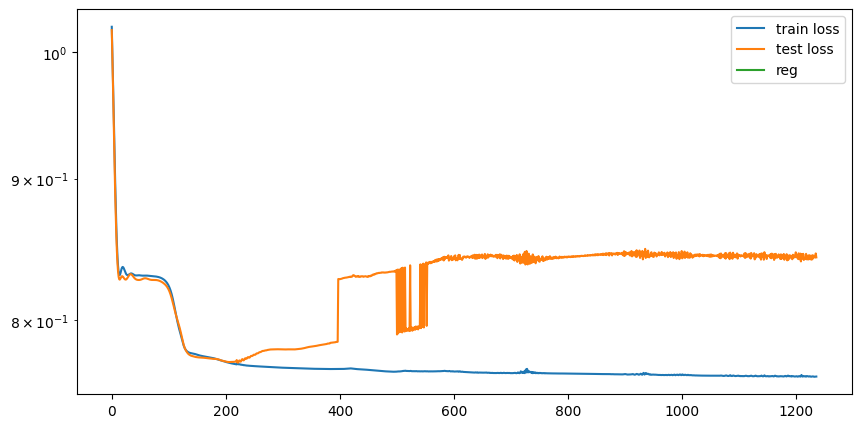

Training model with parameters: seed=1, neurons=[13, 5, 5, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 2671 parameters.
Classification


Epoch: 645/5000 | train loss: 7.65e-01 | test loss: 8.75e-01 | reg: 0.00e+00:  13%|▏| 645/5000 [04:0/home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks/../Scripts/KAN.py:2482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

Early stopping


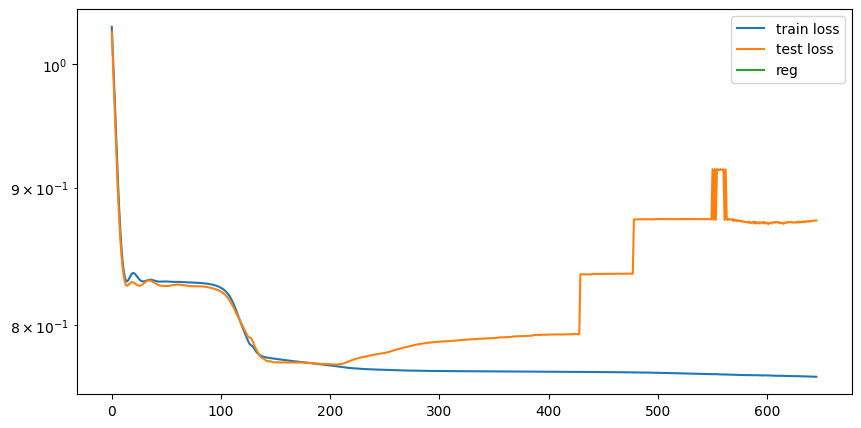

Training model with parameters: seed=2, neurons=[13, 5, 5, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=0.0, lr=0.01
The model has 2671 parameters.
Classification


Epoch: 606/5000 | train loss: 7.63e-01 | test loss: 8.33e-01 | reg: 0.00e+00:  12%| | 606/5000 [03:5/home/apolo/PhD/MonoKAN_tests/MonoKAN/Notebooks/../Scripts/KAN.py:2482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

Early stopping


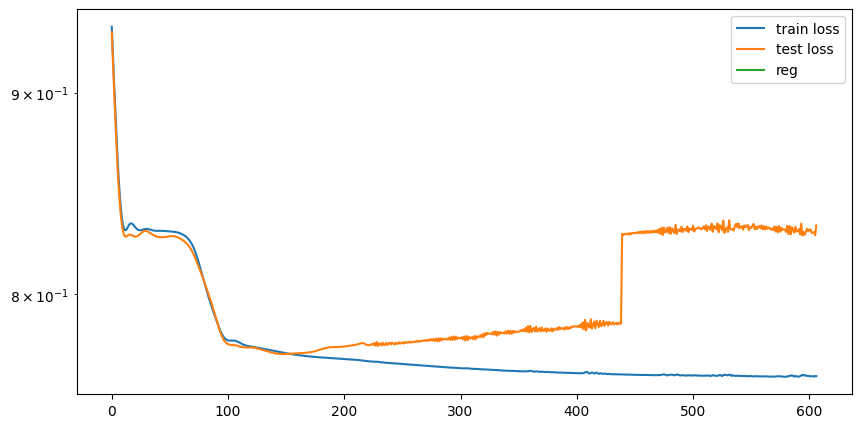

Grid search completed and results saved to grid_search_results.csv


In [22]:
dataset_name ='compas'
grid_search(dataset_name=dataset_name,neurons_list=neurons_list, k_list=k_list, lambda_l1_list=lambda_l1_list,
            lambda_entropy_list=lambda_entropy_list, seeds=seeds
                ,grids=grids, noise_scale=noise_scale, noise_scale_base=noise_scale_base, grid_eps=grid_eps,
             symbolic_enabled=symbolic_enabled, opt=opt, patience=patience, hermite=hermite,normalize=False,
                steps=steps, lamb=lamb, small_reg_factor=small_reg_factor,
             update_grid=update_grid, lr_list=lr_list, monotonic=monotonic, base_function=base_function,batch_size=batch)

In [14]:
### RESULTS FOR THE FIRST THREE
import ast
results = pd.read_csv('grid_search_results_compas.csv')
## Compute the mean of the first 3 values
mean_first_3 = results['test'].iloc[:3].mean().round(3)*100
print(f'Mean of the first 3 values: {mean_first_3}')
## Compute the standard deviation
std_dev = results['test'].iloc[:3].std().round(3)*100
print(f'Standard deviation: {std_dev}')
results.head(3)

Mean of the first 3 values: 69.6
Standard deviation: 0.2


,neurons,k,lamb,noise_scale,noise_scale_base,lambda_l1,lambda_entropy,grid,seed,opt,patience,hermite,normalize,lr,bath_size,train,test
0,"[13, 5, 5, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,0,Adam,500,True,False,0.01,-1,0.688880,0.697976
1,"[13, 5, 5, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,1,Adam,500,True,False,0.01,-1,0.682196,0.695547
2,"[13, 5, 5, 1]",-1,0.0,0.1,0.1,0.0,0.0,10,2,Adam,500,True,False,0.01,-1,0.680778,0.693117


Upload skipped, file /content/data/train_compas.csv exists.
Upload skipped, file /content/data/test_compas.csv exists.
Classification


Epoch: 642/5000 | train loss: 4.48e-01 | test loss: 4.54e-01 | reg: 0.00e+00:  13%|▏| 642/5000 [04:4


Early stopping
Best test loss:  tensor(0.2043, grad_fn=<MeanBackward0>)
Train Accuracy 0.688474782256431
Test Accuracy 0.6947368421052632


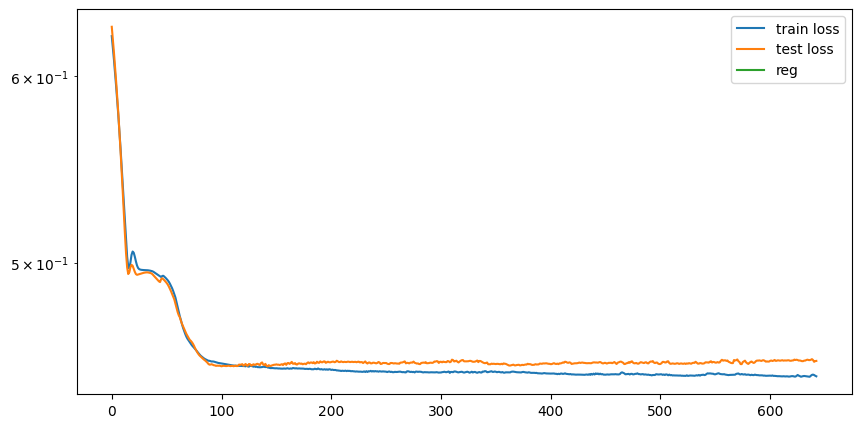

In [32]:
import KAN
importlib.reload(KAN)
from KAN import KAN
torch.manual_seed(0)

### LOAD DATA
X_train, X_test = get_train_n_test_data(dataset_name=dataset_name)
y_train_tensor = torch.tensor(X_train['ground_truth'].values, dtype=torch.float).view(-1,1)
y_test_tensor = torch.tensor(X_test['ground_truth'].values, dtype=torch.float).view(-1,1)
X_train_tensor = torch.tensor(X_train.drop(columns=['ground_truth']).values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.drop(columns=['ground_truth']).values, dtype=torch.float)

dataset = dict()
dataset['train_input'] = X_train_tensor
dataset['train_label'] = y_train_tensor
dataset['test_input'] = X_test_tensor
dataset['test_label'] = y_test_tensor

## INITIALIZATION
ini = X_train_tensor.min().item()
fin = X_train_tensor.max().item()
n_var = X_train_tensor.shape[1]
classification = True
hermite = True
seed=0


# Define other fixed parameters
model = KAN(width=[n_var,5,5,1], grid=10,grid_range=[ini,fin], k=-1,
            noise_scale=0.1,noise_scale_base=0.1, seed=0,grid_eps=0,
            base_fun=torch.nn.Sigmoid(),symbolic_enabled=False,classification=classification,hermite=hermite)

if hermite:
    mono_vars ={i:1 if i in range(4) else 0 for i in range(13)}
    model.apply_constraints_hermite(mono_vars)

### TRAINING

if classification:
    print('Classification')
    loss_fn = nn.BCELoss()
else:
    print('Regression')
    loss_fn = nn.MSELoss()

model.train(dataset, opt="Adam", steps=5000, lamb=0.00,lamb_l1=0,lamb_entropy=0,small_reg_factor=0, lamb_coef=0, lamb_coefdiff=0,
            update_grid=False,lr=0.01,monotonic=True,monotonic_vars=mono_vars,patience=500,loss_fn=None)



### Results
if not classification:
    y_pred = model.forward(X_train_tensor)
    ## Unnormalize
    # y_pred = normalize(y_pred,mode='unnormalize',min_val=min_val_y,max_val=max_val_y)
    print('Train MSE Error',mean_squared_error(y_pred.detach().numpy(),y_train_tensor.detach().numpy()))

    y_pred = model.forward(X_test_tensor)
    ## Unnormalize
    # y_pred = normalize(y_pred,mode='unnormalize',min_val=min_val_y,max_val=max_val_y)
    # y_test_tensor = normalize(y_test_tensor,mode='unnormalize',min_val=min_val_y,max_val=max_val_y)
    print('Test MSE Error',mean_squared_error(y_pred.detach().numpy(),y_test_tensor.detach().numpy()))
else:
    y_pred = model.forward(X_train_tensor)
    print('Train Accuracy',accuracy_score(y_train_tensor.detach().numpy(),y_pred.detach().numpy().round()))

    y_pred = model.forward(X_test_tensor)
    print('Test Accuracy',accuracy_score(y_test_tensor.detach().numpy(),y_pred.detach().numpy().round()))

model.plot_history()



In [35]:
num_parameters = utils.count_parameters(model)
print(f"The model has {num_parameters} parameters.")

The model has 2671 parameters.


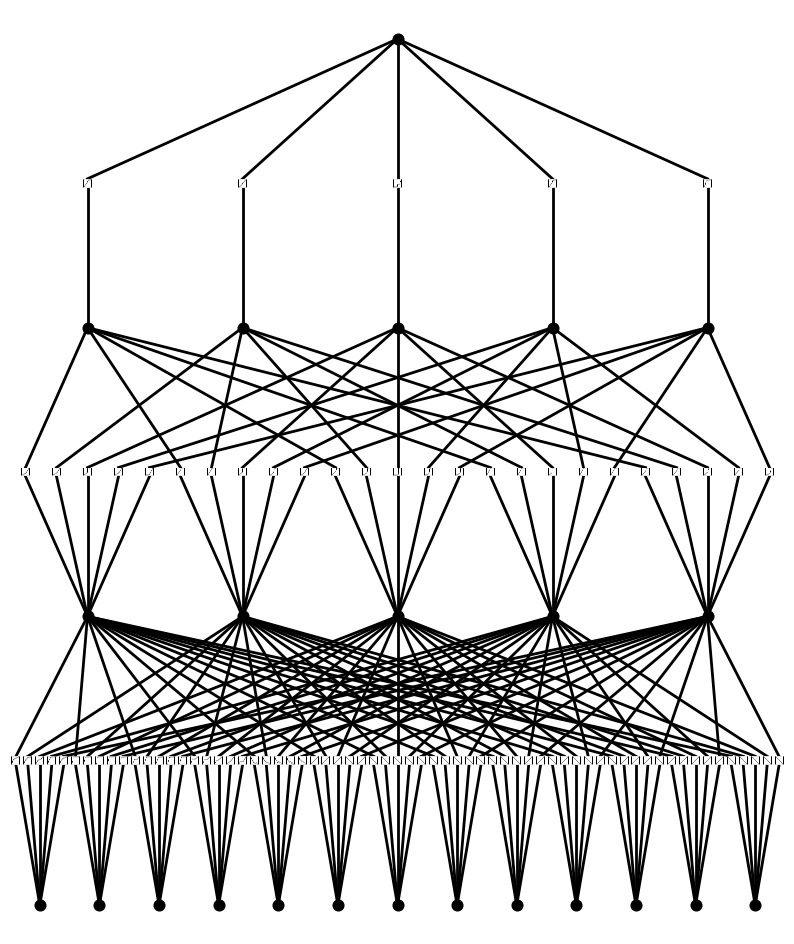

In [33]:
## Delete all the files in the folder figures
import shutil
folder_path = 'figures'
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    os.makedirs(folder_path)

model.plot(beta=1000,scale=1)

# GRID SEARCH - HEART

In [2]:
torch.manual_seed(0)
neurons_list = [[5,3,1]]  # example neuron configurations
k_list = [-1]
lambda_l1_list = [0.0]
lambda_entropy_list = [0.0]
seeds = [0, 1, 2]

# Define other fixed parameters
grids = [7]
noise_scale = 0.1
noise_scale_base = 0.1
grid_eps = 0
symbolic_enabled = False
opt = "Adam"
steps = 5000
lamb = 0.00
small_reg_factor = 0
update_grid = False
lr_list = [0.05]
monotonic = True
base_function = torch.nn.Sigmoid()
patience = 100
batch = -1
hermite = True

Number of instances in train_data: torch.Size([242, 13])
Number of instances in test_data: torch.Size([61, 13])
Number of instances in train_data: 242
Number of instances in test_data: 61
Training model with parameters: seed=0, neurons=[13, 5, 3, 1], k=-1, grid=7, lambda_l1=0.0, lambda_entropy=0.0, lr=0.05
The model has 1835 parameters.
Classification


Epoch: 146/5000 | train loss: 1.60e-01 | test loss: 5.95e-01 | best test loss: 2.61e-01 | reg: 0.00e


Early stopping


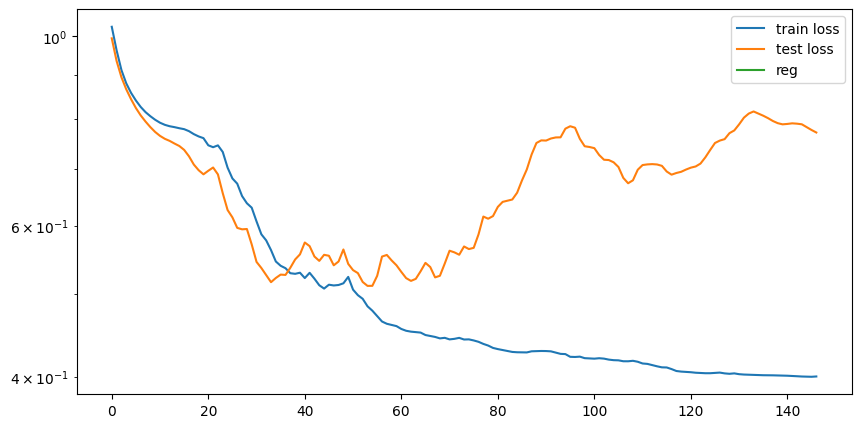

Training model with parameters: seed=1, neurons=[13, 5, 3, 1], k=-1, grid=7, lambda_l1=0.0, lambda_entropy=0.0, lr=0.05
The model has 1835 parameters.
Classification


Epoch: 197/5000 | train loss: 1.59e-01 | test loss: 3.04e-01 | best test loss: 2.70e-01 | reg: 0.00e


Early stopping


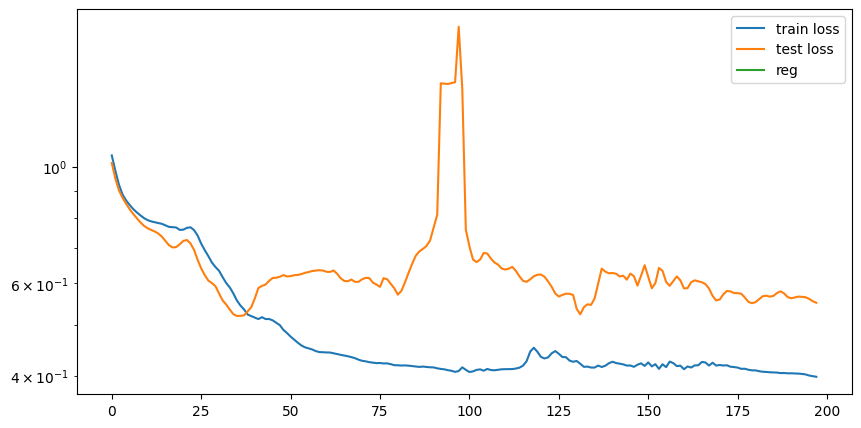

Training model with parameters: seed=2, neurons=[13, 5, 3, 1], k=-1, grid=7, lambda_l1=0.0, lambda_entropy=0.0, lr=0.05
The model has 1835 parameters.
Classification


Epoch: 165/5000 | train loss: 1.61e-01 | test loss: 4.65e-01 | best test loss: 2.70e-01 | reg: 0.00e


Early stopping


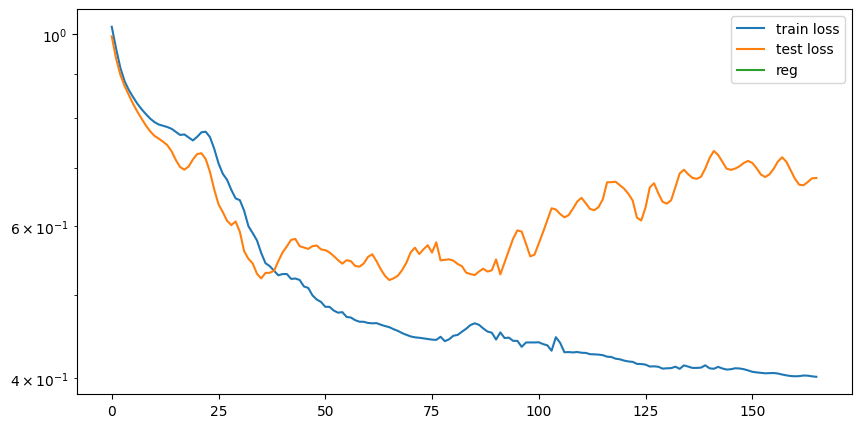

Grid search completed and results saved to grid_search_results.csv


In [10]:
dataset_name ='heart'
torch.use_deterministic_algorithms(True)
grid_search(dataset_name=dataset_name,neurons_list=neurons_list, k_list=k_list, lambda_l1_list=lambda_l1_list,
            lambda_entropy_list=lambda_entropy_list, seeds=seeds
                ,grids=grids, noise_scale=noise_scale, noise_scale_base=noise_scale_base, grid_eps=grid_eps,
             symbolic_enabled=symbolic_enabled, opt=opt, patience=patience, hermite=hermite,normalize=False,
                steps=steps, lamb=lamb, small_reg_factor=small_reg_factor,
             update_grid=update_grid, lr_list=lr_list, monotonic=monotonic, base_function=base_function,batch_size=batch)

In [4]:
results = pd.read_csv('grid_search_results_heart.csv')
## Compute the mean
mean_values = results['test'].mean().round(2)
print(f'Mean of the values: {mean_values}')
## Compute the standard deviation
std_dev = results['test'].std().round(2)
print(f'Standard deviation: {std_dev}')
results.head()

Mean of the values: 0.91
Standard deviation: 0.01


,neurons,k,lamb,noise_scale,noise_scale_base,lambda_l1,lambda_entropy,grid,seed,opt,patience,hermite,normalize,lr,bath_size,train,test
0,"[13, 5, 3, 1]",-1,0.0,0.1,0.1,0.0,0.0,7,0,Adam,100,True,False,0.05,-1,0.859504,0.901639
1,"[13, 5, 3, 1]",-1,0.0,0.1,0.1,0.0,0.0,7,1,Adam,100,True,False,0.05,-1,0.913223,0.901639
2,"[13, 5, 3, 1]",-1,0.0,0.1,0.1,0.0,0.0,7,2,Adam,100,True,False,0.05,-1,0.900826,0.918033


# GRID SEARCH - AUTOMPG

In [9]:
torch.manual_seed(0)
neurons_list = [[2,3,1]]  # example neuron configurations
k_list = [-1]
lambda_l1_list = [0.0]
lambda_entropy_list = [1.0]
seeds = [0, 1, 2]

# Define other fixed parameters
grid = [10]
noise_scale = 0.0
noise_scale_base = 0.0
grid_eps = 0
symbolic_enabled = False
opt = "Adam"
steps = 5000
lamb = 1.00
small_reg_factor = 0
update_grid = False
lr_list = [0.01]
monotonic = True
base_function = torch.nn.Sigmoid()
patience = 500
batch = -1
hermite = True

Number of instances in train_data: 313
Number of instances in test_data: 79
Training model with parameters: seed=0, neurons=[7, 2, 3, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=1.0, lr=0.01
The model has 650 parameters.
Regression


Epoch: 1451/5000 | train loss: 5.02e+00 | test loss: 6.60e+00 | best test loss: 5.85e+00 | reg: 7.80


Early stopping


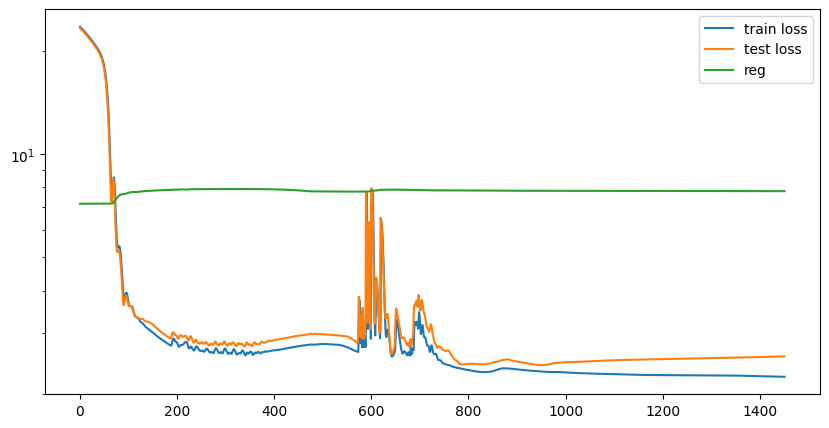

Training model with parameters: seed=1, neurons=[7, 2, 3, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=1.0, lr=0.01
The model has 650 parameters.
Regression


Epoch: 1491/5000 | train loss: 5.02e+00 | test loss: 6.56e+00 | best test loss: 5.83e+00 | reg: 7.80


Early stopping


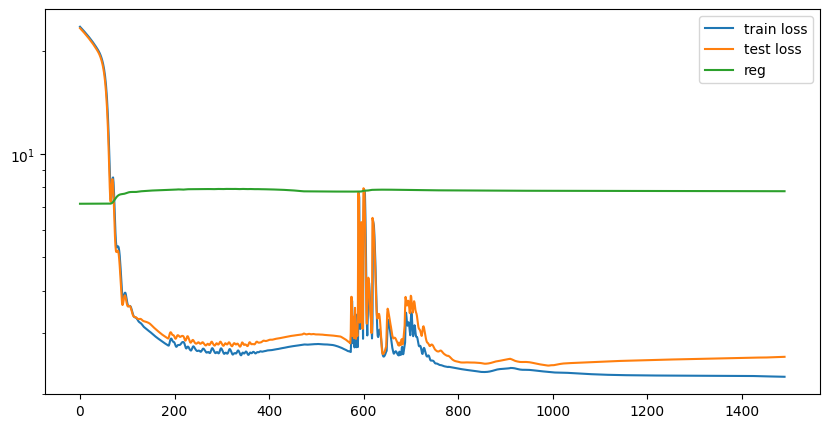

Training model with parameters: seed=2, neurons=[7, 2, 3, 1], k=-1, grid=10, lambda_l1=0.0, lambda_entropy=1.0, lr=0.01
The model has 650 parameters.
Regression


Epoch: 1482/5000 | train loss: 5.01e+00 | test loss: 6.57e+00 | best test loss: 5.79e+00 | reg: 7.80


Early stopping


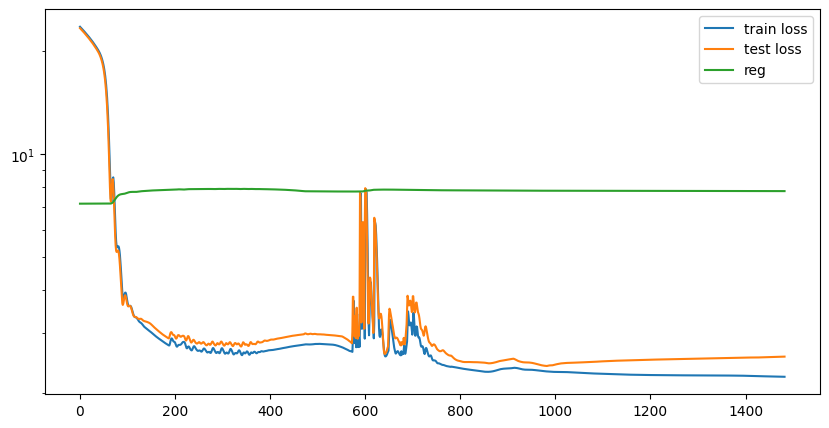

Grid search completed and results saved to grid_search_results.csv


In [18]:
dataset_name ='auto'
grid_search(dataset_name=dataset_name,neurons_list=neurons_list, k_list=k_list, lambda_l1_list=lambda_l1_list,
            lambda_entropy_list=lambda_entropy_list, seeds=seeds
                ,grids=grid, noise_scale=noise_scale, noise_scale_base=noise_scale_base, grid_eps=grid_eps,
             symbolic_enabled=symbolic_enabled, opt=opt, patience=patience, hermite=hermite,normalize=False,
                steps=steps, lamb=lamb, small_reg_factor=small_reg_factor,
             update_grid=update_grid, lr_list=lr_list, monotonic=monotonic, base_function=base_function,batch_size=batch)

In [16]:
results = pd.read_csv('grid_search_results_auto.csv')
## Compute the mean
mean_values = results['test'].mean().round(2)
print(f'Mean of the values: {mean_values}')
## Compute the standard deviation
std_dev = results['test'].std().round(2)
print(f'Standard deviation: {std_dev}')
results.head()

Mean of the values: 5.82
Standard deviation: 0.03


,neurons,k,lamb,noise_scale,noise_scale_base,lambda_l1,lambda_entropy,grid,seed,opt,patience,hermite,normalize,lr,bath_size,train,test
0,"[7, 2, 3, 1]",-1,1.0,0.0,0.0,0.0,1.0,10,0,Adam,500,True,False,0.01,-1,5.380715,5.849362
1,"[7, 2, 3, 1]",-1,1.0,0.0,0.0,0.0,1.0,10,1,Adam,500,True,False,0.01,-1,5.351044,5.831930
2,"[7, 2, 3, 1]",-1,1.0,0.0,0.0,0.0,1.0,10,2,Adam,500,True,False,0.01,-1,5.379066,5.790122
